# Do the following in the wine dataset.
Read the dataset to the python environment.
Try out different clustering models in the wine dataset.
Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

In [1]:
# Import the required libraries and load the dataset 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
Wine = pd.read_csv('Wine.csv')

In [2]:
Wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [3]:
Wine.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [4]:
# As per above results there is no Missing values

In [5]:
Wine.duplicated().sum()

0

In [6]:
# As per above results there are no duplicated rows

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

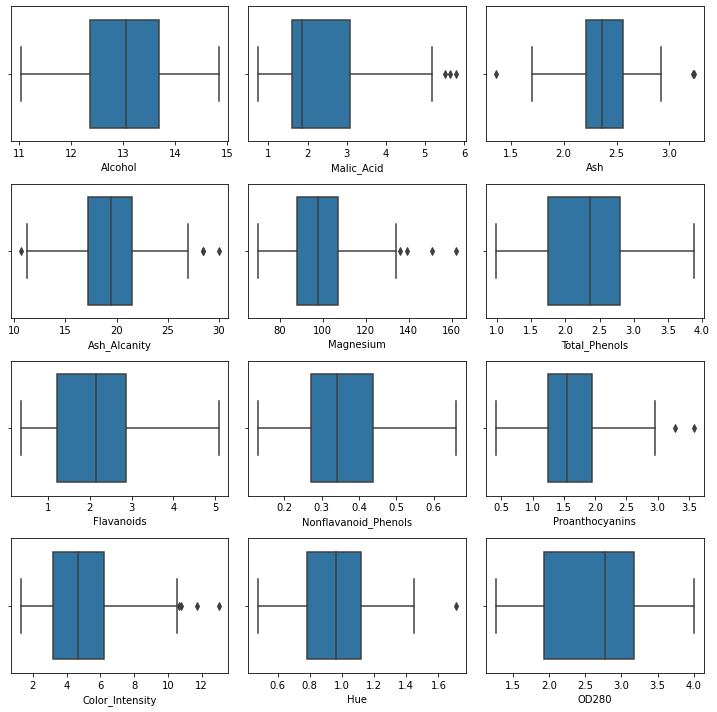

In [7]:
# Box plots for the columns to detect outliers
rows=4
cols=3
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(10,10))
col=Wine.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.boxplot(Wine[col[index]],ax=ax[i][j])
        index=index+1
plt.tight_layout()
plt.show()

# It is clear that the variables Malic acid, Ash, Alcalinity of Ash,Magnesium, Proanthocyanins,Color intensity and Hue have outliers

But since the number of rows in the data is very low (178 ) , we better not remove the outliers for every column

The significant number of outliers exist for only the variables "Magnesium", "Proanthocyanins" & "Color_Intensity" . Let's remove the values that fall outside 15-75 percentile of the normal range

In [8]:
# function for removing outliers falling outside the normal range
def remove_outliers(dataframe, column):
  q3 = dataframe[column].quantile(0.75)
  q1 = dataframe[column].quantile(0.15)
  IQR = q3 - q1
  upper = q3 + (1.5 * IQR)
  lower = q1 - (1.5 * IQR)
  dataframe = dataframe[(dataframe[column] > lower ) & (dataframe[column] < upper)]
  return dataframe

In [9]:
# Remove the outlier values for "Magnesium", "Proanthocyanins" & "Color_Intensity"
Wine = remove_outliers(Wine,'Magnesium')
Wine = remove_outliers(Wine,'Proanthocyanins')
Wine = remove_outliers(Wine,'Color_Intensity')

In [10]:
# By checking Wine info we can see the deduction in row count from 178 to 172 after Outlier removal
Wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               172 non-null    float64
 1   Malic_Acid            172 non-null    float64
 2   Ash                   172 non-null    float64
 3   Ash_Alcanity          172 non-null    float64
 4   Magnesium             172 non-null    int64  
 5   Total_Phenols         172 non-null    float64
 6   Flavanoids            172 non-null    float64
 7   Nonflavanoid_Phenols  172 non-null    float64
 8   Proanthocyanins       172 non-null    float64
 9   Color_Intensity       172 non-null    float64
 10  Hue                   172 non-null    float64
 11  OD280                 172 non-null    float64
 12  Proline               172 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.8 KB


<AxesSubplot:>

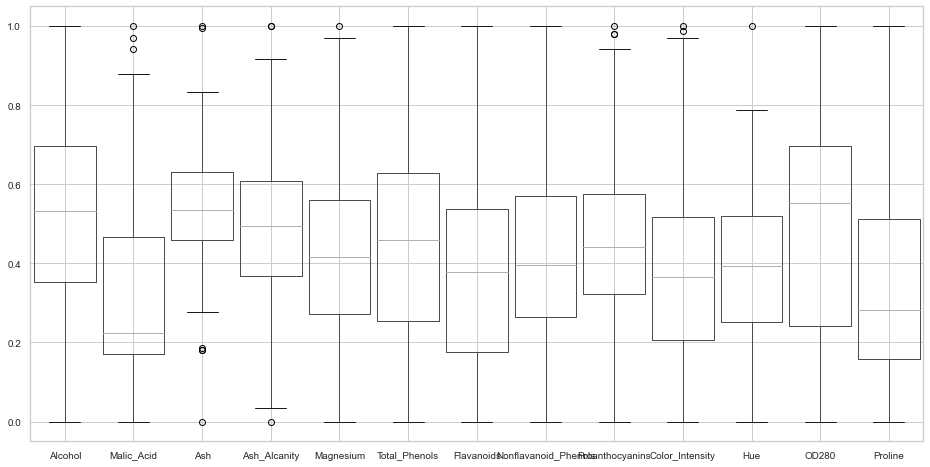

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(Wine) 
Wine.loc[:,:] = scaled_values

sns.set(rc={'figure.figsize':(16,8)}, font_scale=0.9, style='whitegrid')
Wine.boxplot(widths = 0.9)

In [12]:
#After applying min max scaling the number of outliers have reduced as seen above

In [13]:
# Apply standard scaling

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(Wine)

In [14]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score

# K Means Clustering

In [15]:
# K Means Clustering

n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
kmeans_sil_score = [] # silhouette scores

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, init='k-means++').fit(X_train_std)
    clusters_inertia.append(kmeans.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X_train_std, kmeans.labels_)
    kmeans_sil_score.append(silhouette_avg) # data for the silhouette score method

print(kmeans_sil_score)

[0.2647605150642875, 0.29395722763329707, 0.2544323322581304, 0.23691082068524857, 0.20109282057169883, 0.20281729538652182, 0.1374167106441352, 0.14808545942897863, 0.128842038418763]


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


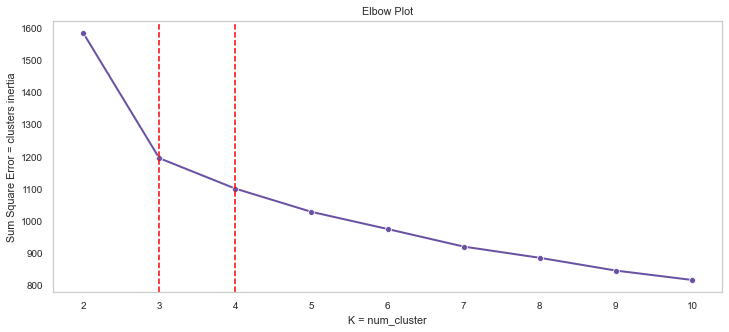



No clear "elbow" visible. A choice of 3 or 4 clusters seems to be fair. Lets see the silhouette score.


In [16]:
# Elbow plot for KMeans
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax, linewidth=2, color='#6A51A3')
ax.set_title("Elbow Plot")
ax.set_xlabel("K = num_cluster")
ax.set_ylabel("Sum Square Error = clusters inertia")
ax.axvline(3, ls="--", c="red")
ax.axvline(4, ls="--", c="red")
plt.grid()
plt.show()

print('\n')
print('No clear "elbow" visible. A choice of 3 or 4 clusters seems to be fair. Lets see the silhouette score.')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


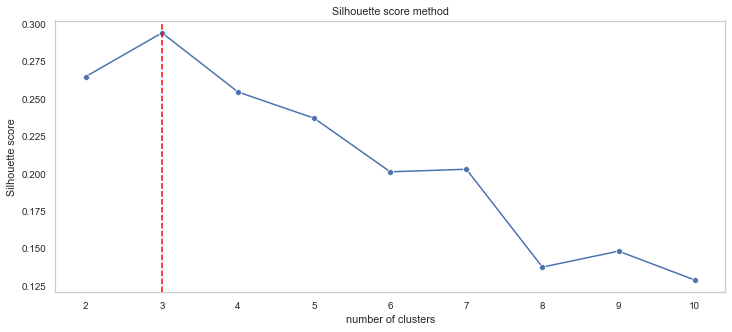

In [17]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, kmeans_sil_score, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


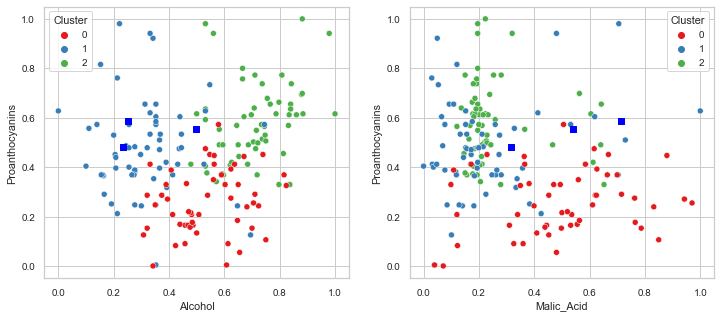

In [18]:
KM_3_clusters = KMeans(n_clusters=3 , init='k-means++').fit(Wine) # initialise and fit K-Means model

KM3_clustered = Wine.copy()
KM3_clustered.loc[:,'Cluster'] = KM_3_clusters.labels_ # append labels to points
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('Alcohol', 'Proanthocyanins', data=KM3_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Malic_Acid', 'Proanthocyanins', data=KM3_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_3_clusters.cluster_centers_[:,1],KM_3_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_3_clusters.cluster_centers_[:,0],KM_3_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


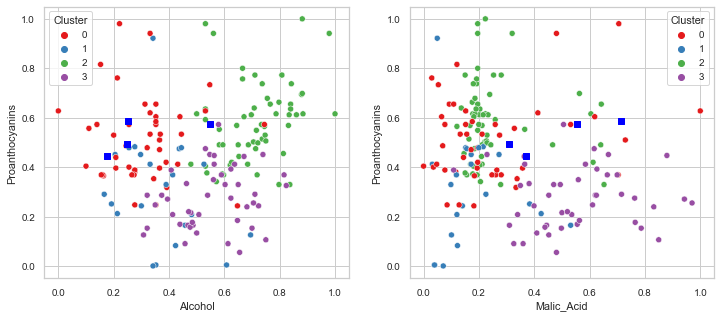

In [19]:
KM_4_clusters = KMeans(n_clusters=4 , init='k-means++').fit(Wine) # initialise and fit K-Means model

KM4_clustered = Wine.copy()
KM4_clustered.loc[:,'Cluster'] = KM_4_clusters.labels_ # append labels to points
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('Alcohol', 'Proanthocyanins', data=KM4_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Malic_Acid', 'Proanthocyanins', data=KM4_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_4_clusters.cluster_centers_[:,1],KM_4_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_4_clusters.cluster_centers_[:,0],KM_4_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

In [20]:
# While comparing 3 Clustered Model is More Organized.

In [21]:
KM_3_clusters.inertia_

50.05074026017976

In [22]:
KM_clust_sizes = KM3_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size = 3"]
KM_clust_sizes

,KM_size = 3
Cluster,
0,52
1,61
2,59


In [23]:
KM3_clustered

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,0.842105,0.191700,0.572193,0.279330,0.863636,0.627586,0.573840,0.283019,0.737255,0.457983,0.455285,0.970696,0.561341,2
1,0.571053,0.205534,0.417112,0.033520,0.454545,0.575862,0.510549,0.245283,0.341176,0.325630,0.463415,0.780220,0.550642,2
2,0.560526,0.320158,0.700535,0.446927,0.469697,0.627586,0.611814,0.320755,0.941176,0.462185,0.447154,0.695971,0.646933,2
3,0.878947,0.239130,0.609626,0.346369,0.651515,0.989655,0.664557,0.207547,0.694118,0.684874,0.308943,0.798535,0.857347,2
4,0.581579,0.365613,0.807487,0.581006,0.727273,0.627586,0.495781,0.490566,0.552941,0.319328,0.455285,0.608059,0.325963,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.553073,0.378788,0.241379,0.056962,0.735849,0.254902,0.674370,0.130081,0.172161,0.329529,0
174,0.623684,0.626482,0.598930,0.692737,0.484848,0.282759,0.086498,0.566038,0.392157,0.632353,0.178862,0.106227,0.336662,0
175,0.589474,0.699605,0.481283,0.525140,0.757576,0.210345,0.073840,0.566038,0.368627,0.936975,0.089431,0.106227,0.397290,0
176,0.563158,0.365613,0.540107,0.525140,0.757576,0.231034,0.071730,0.754717,0.411765,0.842437,0.097561,0.128205,0.400856,0


In [24]:
Wine['KM_Cluster'] = KM3_clustered['Cluster']

In [25]:
Wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               172 non-null    float64
 1   Malic_Acid            172 non-null    float64
 2   Ash                   172 non-null    float64
 3   Ash_Alcanity          172 non-null    float64
 4   Magnesium             172 non-null    float64
 5   Total_Phenols         172 non-null    float64
 6   Flavanoids            172 non-null    float64
 7   Nonflavanoid_Phenols  172 non-null    float64
 8   Proanthocyanins       172 non-null    float64
 9   Color_Intensity       172 non-null    float64
 10  Hue                   172 non-null    float64
 11  OD280                 172 non-null    float64
 12  Proline               172 non-null    float64
 13  KM_Cluster            172 non-null    int32  
dtypes: float64(13), int32(1)
memory usage: 19.5 KB


In [26]:
Wine['KM_Cluster'].value_counts()

1    61
2    59
0    52
Name: KM_Cluster, dtype: int64

# Agglomerative Clustering

In [27]:
df4 = Wine.drop('KM_Cluster',axis=1)

# Normalize the data before fitting the model using MinMax Scaling
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df4) 
df4.loc[:,:] = scaled_values

# Running Agglomerative Clustering
nr_clusters = []
n_clusters = range(2, 10) # Range is arbitrarily chosen
ag_sil_score = [] # silouette scores

for p in n_clusters:
    ag = AgglomerativeClustering(n_clusters=p).fit(df4)
    nr_clusters.append((len(np.unique(ag.labels_))))
    ag_sil_score.append(silhouette_score(df4, ag.labels_))
    
results = pd.DataFrame([n_clusters, nr_clusters, ag_sil_score], index=['n_clusters','clusters', 'sil_score']).T
results.sort_values(by='sil_score', ascending=False).head() # display only 5 best scores

,n_clusters,clusters,sil_score
1,3.0,3.0,0.296017
0,2.0,2.0,0.291645
2,4.0,4.0,0.236418
5,7.0,7.0,0.201966
4,6.0,6.0,0.200129


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


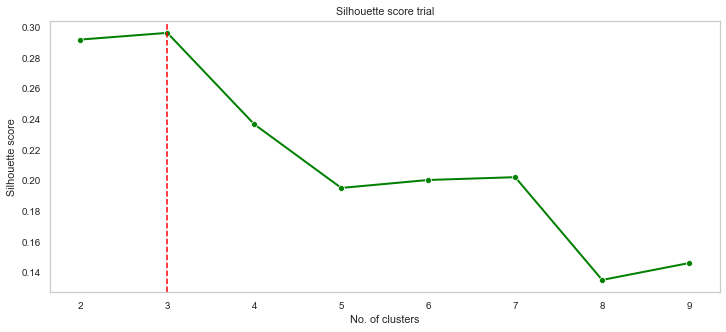

In [28]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, ag_sil_score, marker='o', ax=ax, linewidth=2, color='green')
ax.set_title("Silhouette score trial")
ax.set_xlabel("No. of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

In [29]:
# To fit the model using agglomerative clustering
ag = AgglomerativeClustering(n_clusters=3).fit(df4)
ag_clustered = df4.copy()
ag_clustered.loc[:,'AgCluster'] = ag.labels_ # append labels to points
ag_clust_sizes = ag_clustered.groupby('AgCluster').size().to_frame()
ag_clust_sizes.columns = ["Agglomerative Cluster size"]
ag_clust_sizes

,Agglomerative Cluster size
AgCluster,
0,56
1,59
2,57


# Provide the dataset using both Kmeans and agglomerative clustering models

In [30]:
Wine['KMean_Cluster'] = KM3_clustered['Cluster']
Wine['Agm_Cluster'] = ag_clustered['AgCluster']

In [31]:
Cluster_Check = Wine[['KMean_Cluster', 'Agm_Cluster']]

In [32]:
Cluster_Check.head(75)

,KMean_Cluster,Agm_Cluster
0,2,2
1,2,2
2,2,2
3,2,2
4,2,1
...,...,...
71,1,1
72,1,1
74,1,1
75,1,1


In [33]:
Wine['Cluster-Match'] = np.where( ( (Wine['KMean_Cluster'] == 1) & (Wine['Agm_Cluster'] == 0 ) ) |
                                 ( ((Wine['KMean_Cluster'] == 0) & (Wine['Agm_Cluster'] == 2 )) ) |
                                 ( ((Wine['KMean_Cluster'] == 2) & (Wine['Agm_Cluster'] == 1 )) ) , 'Matched', 'No Match')

In [34]:
Wine['Cluster-Match']

0      No Match
1      No Match
2      No Match
3      No Match
4       Matched
         ...   
173    No Match
174    No Match
175    No Match
176    No Match
177    No Match
Name: Cluster-Match, Length: 172, dtype: object

In [35]:
Wine['Cluster-Match'].value_counts()

No Match    166
Matched       6
Name: Cluster-Match, dtype: int64

# Only 6 predictions out of 172 have differences in the predicted clusters for KMeans and Agglomerative clustering
But the other methods can be tried on and further fine tuned so that the cluster predictions are more accurate

In [ ]:
# Thanks- linto